In [344]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np


In [268]:
# load weather data

with open('chicago_weather.json') as data_file:    
    data = json.load(data_file)
data[4454]['weather']

[{'description': 'haze', 'icon': '50d', 'id': 721, 'main': 'Haze'}]

In [269]:
# grab relevant weather data to lists

cloud_coverage = []
temperature = []
weather_type = []
date = []

for datapoint in data:
    cloud_coverage.append(datapoint['clouds']['all'])
    temperature.append(datapoint['main']['temp'])
    weather_type.append(datapoint['weather'][0]['main'])
    date.append(datapoint['dt_iso'])


In [292]:
# create weather dataframe

df = pd.DataFrame({
    "Cloud Coverage (%)": cloud_coverage,
    "Temperature (K)": temperature,
    "Weather": weather_type,
    "Date": date
                  })

df.head()

,Cloud Coverage (%),Date,Temperature (K),Weather
0,90,2014-01-01 00:00:00 +0000 UTC,261.98,Rain
1,68,2014-01-01 01:00:00 +0000 UTC,262.11,Rain
2,68,2014-01-01 02:00:00 +0000 UTC,262.30,Rain
3,68,2014-01-01 03:00:00 +0000 UTC,262.43,Rain
4,68,2014-01-01 04:00:00 +0000 UTC,262.15,Snow


In [272]:
# filter for only 2017

df_2017 = df.loc[df["Date"].str.startswith('2017')]
df_2017.head()

,Cloud Coverage (%),Date,Temperature (K),Weather
16018,90,2017-01-01 00:00:00 +0000 UTC,274.06,Clouds
16019,40,2017-01-01 01:00:00 +0000 UTC,272.94,Clouds
16020,1,2017-01-01 02:00:00 +0000 UTC,272.14,Clear
16021,1,2017-01-01 03:00:00 +0000 UTC,270.97,Clear
16022,1,2017-01-01 04:00:00 +0000 UTC,270.14,Clear


In [294]:
# remove timestamps, get daily averages of temperature and cloud coverage, find the most common weather "type" of the day,
# convert Kelvin to Fahrenheit

df_2017['Date'] = df_2017['Date'].str.split(' ').str[0]
df_days = df_2017.groupby("Date").mean()
df_days["Weather"] = df_2017.groupby("Date").max()["Weather"]
df_days["Average Temperature (F)"] = 9/5 * (df_days["Temperature (K)"] - 273) + 32
df_days = df_days.reset_index()

df_days = df_days.drop(columns=["Temperature (K)"])
df_days.drop(df_days.tail(1).index,inplace=True)


df_days.head()

,Date,Cloud Coverage (%),Weather,Average Temperature (F)
0,2017-01-01,6.500000,Mist,28.02200
1,2017-01-02,54.916667,Rain,33.83975
2,2017-01-03,90.000000,Rain,39.21050
3,2017-01-04,28.458333,Mist,20.11850
4,2017-01-05,66.166667,Snow,11.18675


In [309]:
# read divvy data

div = pd.read_csv("divvy_data_2017.csv")

div.head()

,Unnamed: 0,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,hour
0,0,13518905,2017-03-31 23:59:07,2017-04-01 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,23
1,1,13518904,2017-03-31 23:56:25,2017-04-01 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,23
2,2,13518903,2017-03-31 23:55:33,2017-04-01 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,23
3,3,13518902,2017-03-31 23:54:46,2017-03-31 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,23
4,4,13518901,2017-03-31 23:53:33,2017-04-01 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,23


In [310]:
# pull relevant divvy data to dataframe

div_df = pd.DataFrame({"Date": div["start_time"],
                      "Count": div.index.values})
div_df.head()


,Count,Date
0,0,2017-03-31 23:59:07
1,1,2017-03-31 23:56:25
2,2,2017-03-31 23:55:33
3,3,2017-03-31 23:54:46
4,4,2017-03-31 23:53:33


In [311]:
# remove timestamp

div_df['Date'] = div_df['Date'].str.split(' ').str[0]

In [312]:
# groupy by date to get count of divvy rides

div_df = div_df.groupby("Date").count()
div_df.head()

,Count
Date,
2017-01-01,1727
2017-01-02,1960
2017-01-03,4537
2017-01-04,3269
2017-01-05,2917


In [313]:
# reset index to prep dataframe merges

div_df = div_df.reset_index()
div_df.head()

,Date,Count
0,2017-01-01,1727
1,2017-01-02,1960
2,2017-01-03,4537
3,2017-01-04,3269
4,2017-01-05,2917


In [314]:
# merge dataframes

df_final = df_days

df_final["# of Divvy Rides"] = div_df["Count"]
df_final.head()



,Date,Cloud Coverage (%),Weather,Average Temperature (F),# of Divvy Rides
0,2017-01-01,6.500000,Mist,28.02200,1727
1,2017-01-02,54.916667,Rain,33.83975,1960
2,2017-01-03,90.000000,Rain,39.21050,4537
3,2017-01-04,28.458333,Mist,20.11850,3269
4,2017-01-05,66.166667,Snow,11.18675,2917


<function matplotlib.pyplot.show>

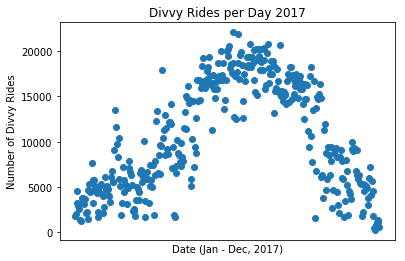

In [331]:
# divvy rides per day through 2017

plt.scatter(df_final["Date"], df_final["# of Divvy Rides"])

plt.title("Divvy Rides per Day 2017")
plt.xlabel("Date (Jan - Dec, 2017)")
plt.ylabel("Number of Divvy Rides")
plt.xticks([])
plt.show

<function matplotlib.pyplot.show>

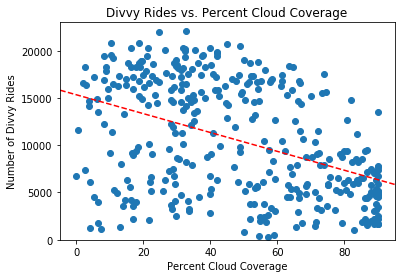

In [372]:
# number of divvy rides based on the days average percent cloud coverage

plt.scatter(df_final["Cloud Coverage (%)"], df_final["# of Divvy Rides"])
plt.title("Divvy Rides vs. Percent Cloud Coverage")
plt.xlabel("Percent Cloud Coverage")
plt.ylabel("Number of Divvy Rides")

z = np.polyfit(df_final["Cloud Coverage (%)"], df_final["# of Divvy Rides"], 1)
p = np.poly1d(z)
plt.plot(z,p(z), "r--")

plt.xlim(-5, 95)
plt.ylim(-10, 23000)

plt.show

(-2000, 23000)

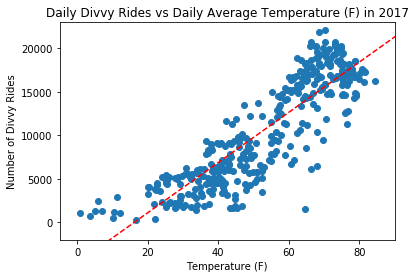

In [382]:
# number of divvy rides based on the days average Temperature

plt.scatter(df_final["Average Temperature (F)"], df_final["# of Divvy Rides"])
plt.title("Daily Divvy Rides vs Daily Average Temperature (F) in 2017")
plt.xlabel("Temperature (F)")
plt.ylabel("Number of Divvy Rides")

z = np.polyfit(df_final["Average Temperature (F)"], df_final["# of Divvy Rides"], 1)
p = np.poly1d(z)
plt.plot(z,p(z), "r--")

plt.xlim(-5, 90)
plt.ylim(-2000, 23000)

In [383]:
# format dataframe to show average number of divvy rides during different weather conditions

df_weather = df_final.groupby("Weather").sum()
df_weather = df_weather.dropna()

df_weather

,Cloud Coverage (%),Average Temperature (F),# of Divvy Rides
Weather,,,
Clear,2.166667,143.894241,34927
Clouds,2251.212451,3311.037742,691640
Drizzle,104.102941,110.411059,20840
Haze,301.625000,671.011750,154927
Mist,2273.376812,3749.869291,834688
Rain,5378.542933,4868.102989,945411
Smoke,42.458333,103.978000,23188
Snow,3187.497826,1538.839149,235182
Thunderstorm,4032.956225,4644.208924,887560


Text(0,0.5,'Number of Divvy Rides')

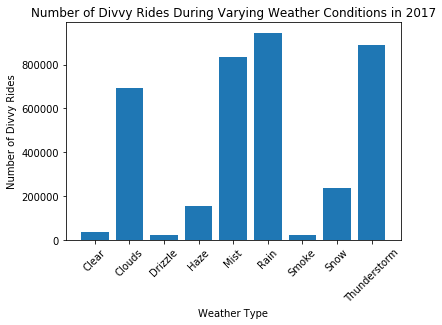

In [384]:
# Average number of divvy rides based on the day's general weather

plt.bar(df_weather.index, df_weather["# of Divvy Rides"])
plt.xticks(rotation=45)
plt.title("Number of Divvy Rides During Varying Weather Conditions in 2017")
plt.xlabel("Weather Type")
plt.ylabel("Number of Divvy Rides")